In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# notebook settings
pd.set_option('display.max_columns', None)

In [2]:
def coef_graph():
    # plotting columns and their coef impact on predictions
    coefs = pd.DataFrame(
    regr.coef_,
    #  columns=['Coefficients'], index=X_train.columns
    columns=['Coefficients'], index=X.columns
    )

    # sort coefficients highest to lowest
    coefs.sort_values(by=['Coefficients'], inplace=True)

    # function to add value labels
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])

    # creating the graph
    coefs.plot(kind='barh', figsize=(9, 7))
    plt.title('Linear Regression Model')
    plt.axvline(x=0, color='.5')
    plt.subplots_adjust(left=.3)

# Data Preprocessing

In [3]:
ml_df = pd.read_csv('./data/machine-learning.csv', index_col=0)

# dropping redundant columns
ml_df.drop(['E_DAYPOP', 'C-E_DAYPOP'], axis=1, inplace=True)

# dropping features
ml_df.drop(['E_AGE65', 'E_AGE17', 'C-E_AGE65', 'C-E_AGE17', 'E_HH', 'C-E_HU', 'C-E_HH', 'C-E_TOTPOP'], axis=1, inplace=True)

In [4]:
# Splitting dataset for predictions
y = ml_df['Risk Category']
X = ml_df.drop(['C-Deaths', 'Deaths', 'Deaths per 100,000 Population', 'C-Deaths per 100,000 Population', 'Risk Category'], axis=1)  # ensure learning is blind to any death values

In [5]:
# Scaling X learning data
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)

# Random Forest Approach

In [6]:
# Importing necessary packages
import pandas as pd
# from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
# Defining learning method
rfc = RandomForestClassifier(
    # max_depth=12,
    n_estimators = 1000,
    # max_features = 12,
    n_jobs = -1
    )

# Defining oversampling method
smote = SMOTE(sampling_strategy='not majority')

# Define the learning pipeline
clf = Pipeline(steps=[('sampling', smote), ('classifier', rfc)])


Model accuracy on testing data: 0.7604895104895105
Model accuracy on training data: 1.0
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1000
           1       0.68      0.80      0.74       716

    accuracy                           0.76      1716
   macro avg       0.76      0.77      0.76      1716
weighted avg       0.77      0.76      0.76      1716


Model accuracy on testing data: 0.7486880466472303
Model accuracy on training data: 1.0
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1007
           1       0.67      0.78      0.72       708

    accuracy                           0.75      1715
   macro avg       0.75      0.75      0.75      1715
weighted avg       0.76      0.75      0.75      1715


Model accuracy on testing data: 0.7620991253644315
Model accuracy on training data: 1.0
              precision    recall  f1-score   support

           0       0.83 

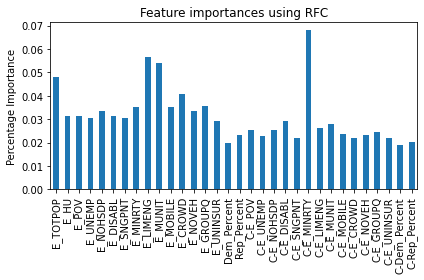

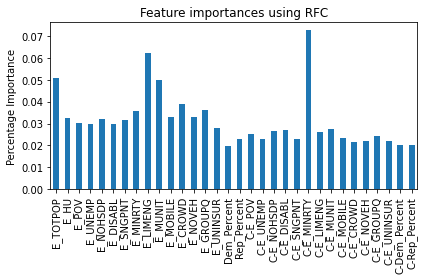

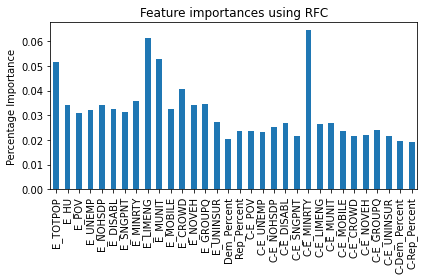

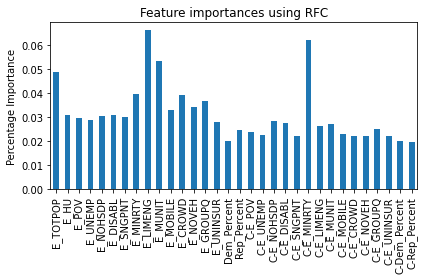

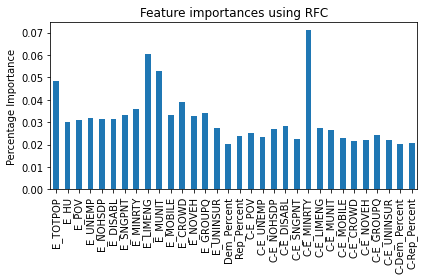

In [8]:
# Splitting X and y into training datasets
# kf = KFold(n_splits=10, shuffle=True)
kf = KFold(n_splits=5, shuffle=True)
for train_index,val_index in kf.split(X):
    X_train,X_test = X.iloc[train_index],X.iloc[val_index],
    y_train,y_test = y.iloc[train_index],y.iloc[val_index]

    clf.fit(X_train, y_train)

    # testing model for general accuracy
    print(f'\nModel accuracy on testing data: {clf.score(X_test, y_test)}')
    print(f'Model accuracy on training data: {clf.score(X_train, y_train)}')

    # Creating confusion matrix
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions)

    # Printing summary of model
    # recall - correct positives
    # precision - false positives
    print(classification_report(y_test, predictions))

    # Displaying feature importances
    importances = clf[1].feature_importances_
    forest_importances = pd.Series(importances, index=X.columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using RFC")
    ax.set_ylabel("Percentage Importance")
    fig.tight_layout()
    fig

# XGBoost Approach

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.7583955223880597

In [11]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [12]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [13]:
grid_cv.best_score_

0.8311081406050901

In [14]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 10,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [15]:
# Insert the fixed values to the grid
param_grid['subsample'] = [0.8]
param_grid['colsample_bytree'] = [0.5]
param_grid['gamma'] = [0.25]
param_grid["reg_lambda"] = [1]


# give new value ranges to other params - ones which hit their limits in the best_params model
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]
param_grid["max_depth"] = [9, 15, 20]
param_grid['scale_pos_weight'] = [5, 7, 10]

In [16]:
param_grid

{'max_depth': [9, 15, 20],
 'learning_rate': [0.3, 0.5, 0.7, 1],
 'gamma': [0.25],
 'reg_lambda': [1],
 'scale_pos_weight': [5, 7, 10],
 'subsample': [0.8],
 'colsample_bytree': [0.5]}

In [17]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, cv=3, scoring="roc_auc", n_jobs=-1)
_ = grid_cv_2.fit(X_train, y_train)
grid_cv_2.best_score_

0.8232521341635729

In [18]:
grid_cv_2.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.3,
 'max_depth': 15,
 'reg_lambda': 1,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [19]:
# Insert the fixed values to the grid
param_grid['subsample'] = [0.8]
param_grid['colsample_bytree'] = [0.5]
param_grid['gamma'] = [0.25]
param_grid["reg_lambda"] = [1]
param_grid['scale_pos_weight'] = [5]

# give new value ranges to other params - ones which hit their limits in the best_params model
param_grid["learning_rate"] = [0.05, 0.1, 0.2, 0.3]
param_grid["max_depth"] = [7, 8, 9]

In [20]:
grid_cv_3 = GridSearchCV(xgb_cl, param_grid, cv=3, scoring="roc_auc", n_jobs=-1)
_ = grid_cv_3.fit(X_train, y_train)
grid_cv_3.best_score_

0.8299904550918024

In [21]:
grid_cv_3.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 8,
 'reg_lambda': 1,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [22]:
final_cl = xgb.XGBClassifier(
    **grid_cv_3.best_params_,
    objective="binary:logistic"
)

In [23]:
from sklearn.metrics import roc_auc_score

_ = final_cl.fit(X_train, y_train)

preds = final_cl.predict(X_test)

In [24]:
cm = confusion_matrix(y_test, preds)

In [25]:
cm

array([[786, 468],
       [121, 769]], dtype=int64)

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1254
           1       0.62      0.86      0.72       890

    accuracy                           0.73      2144
   macro avg       0.74      0.75      0.73      2144
weighted avg       0.76      0.73      0.73      2144

